In [38]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
%matplotlib inline

# WALMART - WMT

In [49]:
def Montecarlo_Simulation(CompanyName, years, t_intervals, iterations):
    
    def bold(text):
        return f"\033[1m{text}\033[0m"

    
    df = yf.download(CompanyName, period=years)
    df = df[['Adj Close']]
    print(bold("DataFrame of adjusted close prices:\n"), df, '\n')

    
    log_returns = np.log(df / df.shift(1))
    print(bold("Log returns:\n"), log_returns, '\n')

    
    print(bold("Plot data"),'\n')
    fig = px.line(df)
    fig.show()
    
    print(bold("Plot log returns"),'\n')
    fig = px.line(log_returns)
    fig.show()

    
    u = log_returns.mean()
    print(bold("Mean of log returns:\n"), u, '\n')
    print(bold("Annualized mean (u * 250):\n"), u * 250, '\n')

  
    var = log_returns.var()
    print(bold("Variance of log returns:\n"), var, '\n')
    drift = u - (0.5 * var)
    print(bold("Drift:\n"), drift, '\n')

    
    stdev = log_returns.std()
    print(bold("Standard deviation:\n"), stdev, '\n')

    
    x = np.random.rand(t_intervals, iterations)
    print(bold("Random values (x):\n"), x, '\n')
    Z = norm.ppf(x)
    print(bold("Z-scores (norm.ppf of x):\n"), Z, '\n')

    
    daily_returns = np.exp(drift.values + stdev.values * Z)
    print(bold("Daily returns:\n"), daily_returns, '\n')

    
    s0 = df.iloc[-1]
    print(bold("Last observed stock price (s0):\n"), s0, '\n')

    
    price_list = np.zeros_like(daily_returns)
    print(bold("Initial price list (zeros):\n"), price_list, '\n')
    price_list[0] = s0
    print(bold("Price list after setting initial price:\n"), price_list, '\n')

    
    for t in range(1, t_intervals):
        price_list[t] = price_list[t - 1] * daily_returns[t]
    print(bold("Final price list after simulation:\n"), price_list, '\n')

    print(bold("Plot simulated price paths"),'\n')
    plt.figure(figsize=(10, 6))
    plt.plot(price_list)


    print(bold("Minimum price in simulation:\n"), price_list.min(), '\n')
    print(bold("Maximum price in simulation:\n"), price_list.max(), '\n')
    print(bold("5th percentile of prices:\n"), np.percentile(price_list, 5), '\n')
    print(bold("95th percentile of prices:\n"), np.percentile(price_list, 95), '\n')


[*********************100%%**********************]  1 of 1 completed


DataFrame of adjusted close prices:
             Adj Close
Date                 
2014-12-01  23.449942
2014-12-02  23.498899
2014-12-03  23.230875
2014-12-04  23.181646
2014-12-05  23.006605
...               ...
2024-11-22  90.440002
2024-11-25  89.500000
2024-11-26  91.309998
2024-11-27  91.879997
2024-11-29  92.500000

[2517 rows x 1 columns] 

Log returns:
             Adj Close
Date                 
2014-12-01        NaN
2014-12-02   0.002086
2014-12-03  -0.011471
2014-12-04  -0.002121
2014-12-05  -0.007580
...               ...
2024-11-22   0.022928
2024-11-25  -0.010448
2024-11-26   0.020022
2024-11-27   0.006223
2024-11-29   0.006725

[2517 rows x 1 columns] 

Plot data 



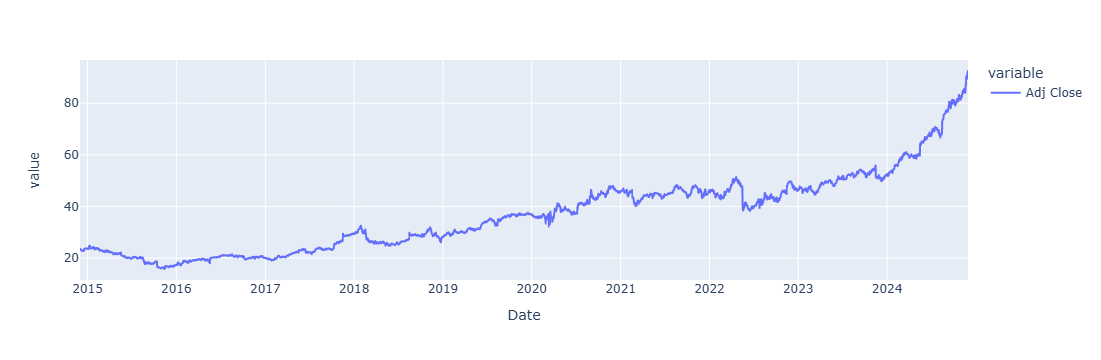

Plot log returns 



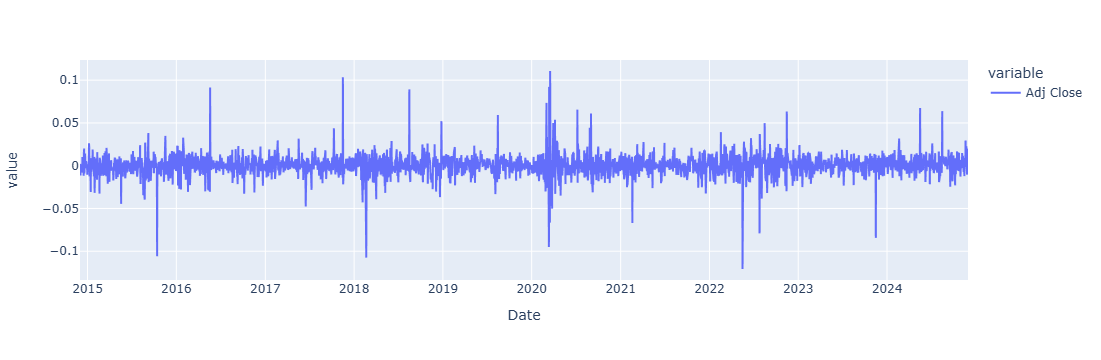

Mean of log returns:
 Adj Close    0.000545
dtype: float64 

Annualized mean (u * 250):
 Adj Close    0.136361
dtype: float64 

Variance of log returns:
 Adj Close    0.000176
dtype: float64 

Drift:
 Adj Close    0.000457
dtype: float64 

Standard deviation:
 Adj Close    0.013285
dtype: float64 

Random values (x):
 [[0.72641378 0.78334886 0.13970136 ... 0.60998974 0.32995615 0.43312505]
 [0.84753165 0.28986363 0.77019653 ... 0.82886259 0.29316813 0.85233904]
 [0.01109313 0.50491848 0.94157736 ... 0.28503652 0.51331078 0.69436314]
 ...
 [0.05447771 0.88527715 0.97328987 ... 0.27078214 0.34746196 0.43416799]
 [0.1747612  0.52915116 0.06205517 ... 0.9366681  0.09012536 0.15257084]
 [0.92517151 0.6212645  0.69342511 ... 0.16790463 0.42070126 0.74396806]] 

Z-scores (norm.ppf of x):
 [[ 0.60200256  0.78355329 -1.08166206 ...  0.27929228 -0.44003426
  -0.16842352]
 [ 1.02590431 -0.55378315  0.73949424 ...  0.94968009 -0.54415289
   1.04651806]
 [-2.28716385  0.0123291   1.56815368 ... -0.

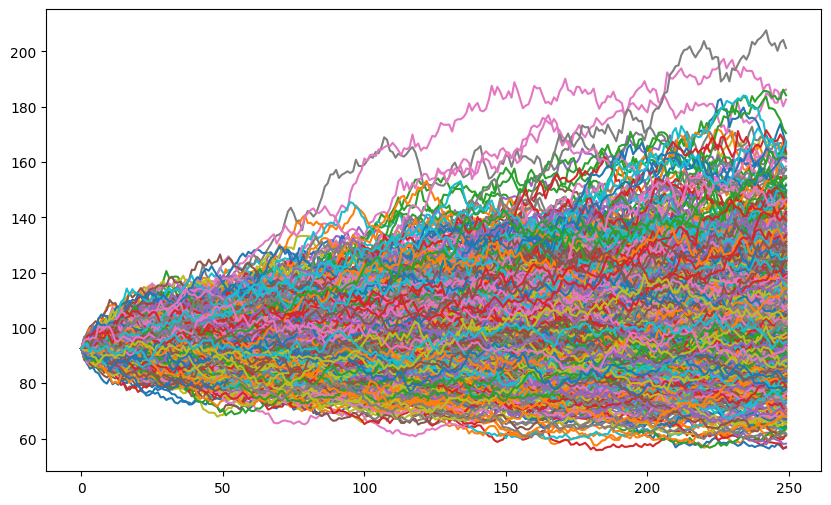

In [50]:
Montecarlo_Simulation('WMT','10y',250,1000)

### **Monte Carlo Simulation: Key Findings for Walmart (WMT)**

1. **Expected Return**: Annualized return ~13.6%, suggesting moderate growth.  
2. **Price Range (1 Year)**: Likely between **77.95** (5th percentile) and **127.78** (95th percentile).  
3. **Volatility**: Standard deviation of **1.3% daily** indicates moderate price fluctuations, suggesting moderate market risk.  
4. **Risks**: Potential downside to **55.74** (worst-case scenario), driven by market volatility, economic downturns, or company-specific factors.

---

### **Investment Recommendations**:
- **Conservative Investors**: Walmart’s moderate volatility offers stability but be mindful of downside risk; set stop-loss near **77**.  
- **Growth Investors**: Pair with higher-growth stocks to balance risk; consider options to enhance returns.  
- **All Investors**: Diversify, and buy on dips near **77** to manage downside volatility.

---

### **Conclusion**: Walmart offers **moderate volatility** with **low risk**, ideal for long-term, stable growth. However, potential downside risk (~$55) underscores the importance of diversification and cautious entry.
